In [354]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.show()

In [ ]:
## Section 1 - Dataframe analysis

In [229]:
## import CSV & display
data = pd.read_csv('sample_retail_sales_dataset final.csv')
data

,Order ID,Date,Customer ID,Product,Quantity Ordered,Price
0,ORD-00001,2023-02-27,CUST-0180,Mouse,2.0,355.07
1,ORD-00002,2023-12-17,CUST-0009,Keyboard,5.0,223.91
2,ORD-00003,2023-08-06,CUST-0072,Tablet,4.0,399.02
3,ORD-00004,2023-02-09,CUST-0193,Printer,5.0,368.69
4,ORD-00005,2023-10-02,CUST-0005,Keyboard,3.0,366.55
...,...,...,...,...,...,...
1003,ORD-00709,2023-12-30,CUST-0107,Mouse,5.0,580.11
1004,ORD-00710,2023-05-15,CUST-0193,Monitor,5.0,590.76
1005,ORD-00711,2023-04-08,CUST-0150,Printer,5.0,622.89
1006,ORD-00712,2023-02-25,CUST-0176,Tablet,5.0,1152.28


In [231]:
data.head()

,Order ID,Date,Customer ID,Product,Quantity Ordered,Price
0,ORD-00001,2023-02-27,CUST-0180,Mouse,2.0,355.07
1,ORD-00002,2023-12-17,CUST-0009,Keyboard,5.0,223.91
2,ORD-00003,2023-08-06,CUST-0072,Tablet,4.0,399.02
3,ORD-00004,2023-02-09,CUST-0193,Printer,5.0,368.69
4,ORD-00005,2023-10-02,CUST-0005,Keyboard,3.0,366.55


In [233]:
## check data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          1008 non-null   object 
 1   Date              1005 non-null   object 
 2   Customer ID       1004 non-null   object 
 3   Product           1006 non-null   object 
 4   Quantity Ordered  1006 non-null   float64
 5   Price             1007 non-null   float64
dtypes: float64(2), object(4)
memory usage: 47.4+ KB


In [235]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Order ID                    object
Date                datetime64[ns]
Customer ID                 object
Product                     object
Quantity Ordered           float64
Price                      float64
dtype: object

In [237]:
#check null values
data.isnull().any()

Order ID            False
Date                 True
Customer ID          True
Product              True
Quantity Ordered     True
Price                True
dtype: bool

In [239]:
data[data['Date'].isna()]

,Order ID,Date,Customer ID,Product,Quantity Ordered,Price
825,ORD-00826,NaT,CUST-0091,Keyboard,5.0,667.71
826,ORD-00827,NaT,CUST-0163,Laptop,1.0,178.33
827,ORD-00828,NaT,CUST-0154,Laptop,2.0,1294.49


In [241]:
data[data['Customer ID'].isna()]

,Order ID,Date,Customer ID,Product,Quantity Ordered,Price
864,ORD-00865,2023-01-04,NaN,Mouse,2.0,513.35
865,ORD-00866,2023-12-18,NaN,Smartphone,4.0,846.60
866,ORD-00867,2023-06-05,NaN,Tablet,5.0,1243.51
867,ORD-00868,2023-10-11,NaN,Laptop,5.0,1275.72


In [243]:
data[data['Product'].isna()]

,Order ID,Date,Customer ID,Product,Quantity Ordered,Price
781,ORD-00782,2023-07-04,CUST-0014,NaN,2.0,1019.24
885,ORD-00886,2023-09-15,CUST-0100,NaN,3.0,1406.81


In [245]:
data[data['Quantity Ordered'].isna()]

,Order ID,Date,Customer ID,Product,Quantity Ordered,Price
915,ORD-00916,2023-08-02,CUST-0149,Smartphone,NaN,1293.18
954,ORD-00955,2023-11-06,CUST-0103,Keyboard,NaN,1083.98


In [247]:
data[data['Price'].isna()]

,Order ID,Date,Customer ID,Product,Quantity Ordered,Price
971,ORD-00972,2023-09-18,CUST-0115,Smartphone,2.0,NaN


In [249]:
## Drop Empty Values
data = data.dropna(how='any',axis=0) 

In [251]:
## Check Empty Values are gone
data[data['Quantity Ordered'].isna()]

,Order ID,Date,Customer ID,Product,Quantity Ordered,Price


In [253]:
## Confirm entries are less than when started
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          996 non-null    object        
 1   Date              996 non-null    datetime64[ns]
 2   Customer ID       996 non-null    object        
 3   Product           996 non-null    object        
 4   Quantity Ordered  996 non-null    float64       
 5   Price             996 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 54.5+ KB


In [255]:
## Check for duplicates
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1003     True
1004     True
1005     True
1006     True
1007     True
Length: 996, dtype: bool

In [257]:
duplicateRows = data[data.duplicated(['Order ID'])]
duplicateRows

,Order ID,Date,Customer ID,Product,Quantity Ordered,Price
1000,ORD-00706,2023-03-21,CUST-0197,Monitor,5.0,408.82
1001,ORD-00707,2023-12-02,CUST-0174,Printer,3.0,755.11
1002,ORD-00708,2023-04-12,CUST-0083,Monitor,5.0,673.34
1003,ORD-00709,2023-12-30,CUST-0107,Mouse,5.0,580.11
1004,ORD-00710,2023-05-15,CUST-0193,Monitor,5.0,590.76
1005,ORD-00711,2023-04-08,CUST-0150,Printer,5.0,622.89
1006,ORD-00712,2023-02-25,CUST-0176,Tablet,5.0,1152.28
1007,ORD-00713,2023-12-22,CUST-0035,Mouse,4.0,337.95


In [259]:
## Drop duplicates
data.drop_duplicates(subset='Order ID', inplace=False)

,Order ID,Date,Customer ID,Product,Quantity Ordered,Price
0,ORD-00001,2023-02-27,CUST-0180,Mouse,2.0,355.07
1,ORD-00002,2023-12-17,CUST-0009,Keyboard,5.0,223.91
2,ORD-00003,2023-08-06,CUST-0072,Tablet,4.0,399.02
3,ORD-00004,2023-02-09,CUST-0193,Printer,5.0,368.69
4,ORD-00005,2023-10-02,CUST-0005,Keyboard,3.0,366.55
...,...,...,...,...,...,...
995,ORD-00996,2023-12-01,CUST-0006,Tablet,5.0,372.72
996,ORD-00997,2023-11-30,CUST-0003,Smartphone,5.0,665.96
997,ORD-00998,2023-05-18,CUST-0042,Smartphone,1.0,1067.96
998,ORD-00999,2023-12-15,CUST-0072,Monitor,4.0,959.58


In [267]:
## Rename Price Column
data = data.rename(columns = {'Price':'Unit Price'})

In [280]:
## Calculate total sales and create new column
data['Total Sales'] = data['Quantity Ordered']*data['Unit Price']
data.head()

,Order ID,Date,Customer ID,Product,Quantity Ordered,Unit Price,Total Sales
0,ORD-00001,2023-02-27,CUST-0180,Mouse,2.0,355.07,710.14
1,ORD-00002,2023-12-17,CUST-0009,Keyboard,5.0,223.91,1119.55
2,ORD-00003,2023-08-06,CUST-0072,Tablet,4.0,399.02,1596.08
3,ORD-00004,2023-02-09,CUST-0193,Printer,5.0,368.69,1843.45
4,ORD-00005,2023-10-02,CUST-0005,Keyboard,3.0,366.55,1099.65


In [284]:
## Extract Month Name and Day Name to new columns
data['Month'] = data['Date'].dt.month_name()
data['Weekday'] = data['Date'].dt.day_name()
data.head()

,Order ID,Date,Customer ID,Product,Quantity Ordered,Unit Price,Total Sales,Month,Weekday
0,ORD-00001,2023-02-27,CUST-0180,Mouse,2.0,355.07,710.14,February,Monday
1,ORD-00002,2023-12-17,CUST-0009,Keyboard,5.0,223.91,1119.55,December,Sunday
2,ORD-00003,2023-08-06,CUST-0072,Tablet,4.0,399.02,1596.08,August,Sunday
3,ORD-00004,2023-02-09,CUST-0193,Printer,5.0,368.69,1843.45,February,Thursday
4,ORD-00005,2023-10-02,CUST-0005,Keyboard,3.0,366.55,1099.65,October,Monday


In [392]:
data['Quantity Ordered'].mean()

3.0512048192771086

In [380]:
## Calculate Total Sales by Weekday
daily_sales = data.groupby('Weekday')['Total Sales'].sum().reset_index()
daily_sales

,Weekday,Total Sales
0,Friday,371824.00
1,Monday,324148.48
2,Saturday,334504.66
3,Sunday,357996.11
4,Thursday,340301.82
5,Tuesday,322459.56
6,Wednesday,324671.11


In [382]:
## Order weekdays for Total Sales
day_order = ['Monday', 'Tuesday', 'Wednesday', 
             'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales['Weekday']=pd.Categorical(daily_sales['Weekday'], categories=day_order, ordered=True)
daily_sales = daily_sales.sort_values('Weekday')
daily_sales


,Weekday,Total Sales
1,Monday,324148.48
5,Tuesday,322459.56
6,Wednesday,324671.11
4,Thursday,340301.82
0,Friday,371824.00
2,Saturday,334504.66
3,Sunday,357996.11


In [298]:
## Calculate Total Sales by month 
monthly_sales = data.groupby('Month')['Total Sales'].sum().reset_index()
monthly_sales

,Month,Total Sales
0,April,211397.78
1,August,199257.48
2,December,213231.49
3,February,175949.85
4,January,173764.85
5,July,194627.50
6,June,200883.36
7,March,223152.34
8,May,208966.07
9,November,212448.52


In [308]:
## Order month for total sales
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month']=pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month')
monthly_sales

,Month,Total Sales
4,January,173764.85
3,February,175949.85
7,March,223152.34
0,April,211397.78
8,May,208966.07
6,June,200883.36
5,July,194627.50
1,August,199257.48
11,September,182087.74
10,October,180138.76


In [330]:
## Identify best selling product by total quantity ordered  
best_seller = data.groupby('Product')['Quantity Ordered'].sum().reset_index()
best_seller = best_seller.sort_values(by= 'Quantity Ordered', ascending =False)
best_seller

,Product,Quantity Ordered
5,Smartphone,527.0
6,Tablet,466.0
2,Monitor,441.0
3,Mouse,426.0
0,Keyboard,412.0
1,Laptop,386.0
4,Printer,381.0


In [332]:
## Average Order Value
avg_order_value = data['Total Sales'].mean()
avg_order_value

2385.447530120482

In [340]:
## Average Order Value Per Product
avg_per_product = data.groupby('Product')['Total Sales'].mean().reset_index()
avg_per_product.rename(columns={'Total Sales': 'Avg Order Value'}, inplace=True)
avg_per_product = avg_per_product.sort_values(by= 'Avg Order Value', ascending=False)
avg_per_product

,Product,Avg Order Value
6,Tablet,2593.022081
3,Mouse,2477.695797
5,Smartphone,2418.167117
4,Printer,2370.815736
0,Keyboard,2350.361594
2,Monitor,2304.271862
1,Laptop,2157.892836


In [342]:
## Total Sales by product
ts_per_product = data.groupby('Product')['Total Sales'].sum().reset_index()
ts_per_product = ts_per_product.sort_values(by = 'Total Sales', ascending = False)
ts_per_product 

,Product,Total Sales
5,Smartphone,394161.24
6,Tablet,386360.29
3,Mouse,341922.02
2,Monitor,334119.42
0,Keyboard,324349.90
4,Printer,305835.23
1,Laptop,289157.64


In [344]:
## Merged table overview
merged = best_seller.merge(avg_per_product, on='Product').merge(ts_per_product, on='Product')
merged

,Product,Quantity Ordered,Avg Order Value,Total Sales
0,Smartphone,527.0,2418.167117,394161.24
1,Tablet,466.0,2593.022081,386360.29
2,Monitor,441.0,2304.271862,334119.42
3,Mouse,426.0,2477.695797,341922.02
4,Keyboard,412.0,2350.361594,324349.90
5,Laptop,386.0,2157.892836,289157.64
6,Printer,381.0,2370.815736,305835.23


In [348]:
## Total sales by Customer  
top_customers = data.groupby('Customer ID')['Total Sales'].sum().reset_index()
top_customers = top_customers.sort_values(by = 'Total Sales', ascending = False)
top_customers.head()

,Customer ID,Total Sales
105,CUST-0107,33499.13
174,CUST-0176,31456.91
17,CUST-0018,29025.98
44,CUST-0045,27919.71
128,CUST-0130,27071.70


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

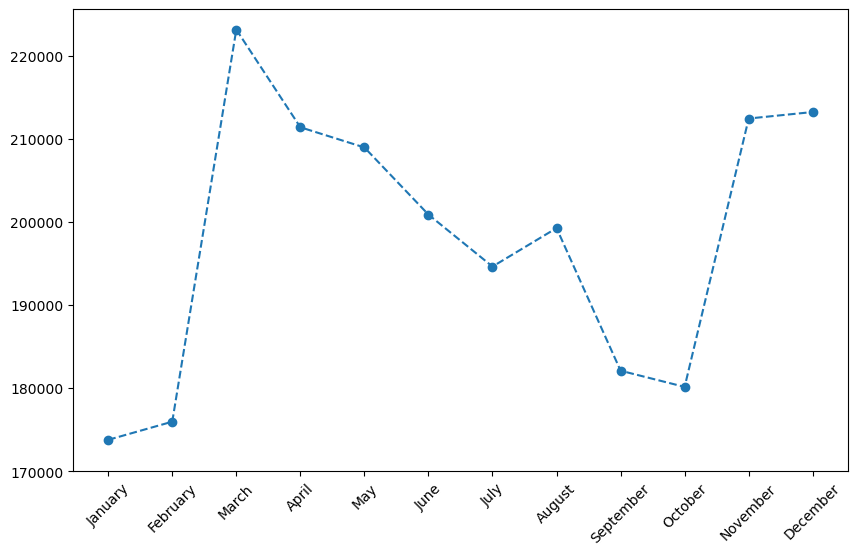

In [364]:
## Visualization Total Sales per Month

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly_sales["Month"],
      monthly_sales["Total Sales"],
      marker="o", linestyle="--")
ax.set_ylim(bottom=170000)  
plt.xticks(rotation=45)

C:\Users\User\AppData\Local\Temp\ipykernel_27900\1123663084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Quantity Ordered', data=best_seller, palette='viridis')


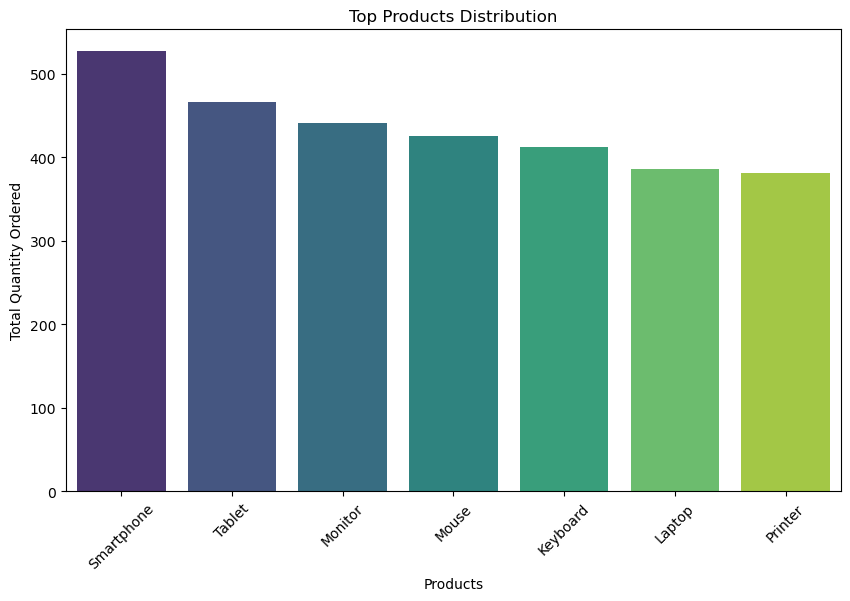

In [378]:
## Visualization Product Distribution

plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Quantity Ordered', data=best_seller, palette='viridis')
plt.title('Top Products Distribution')
plt.xlabel('Products')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_27900\3091344719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekday', y='Total Sales', data=daily_sales, palette='coolwarm')


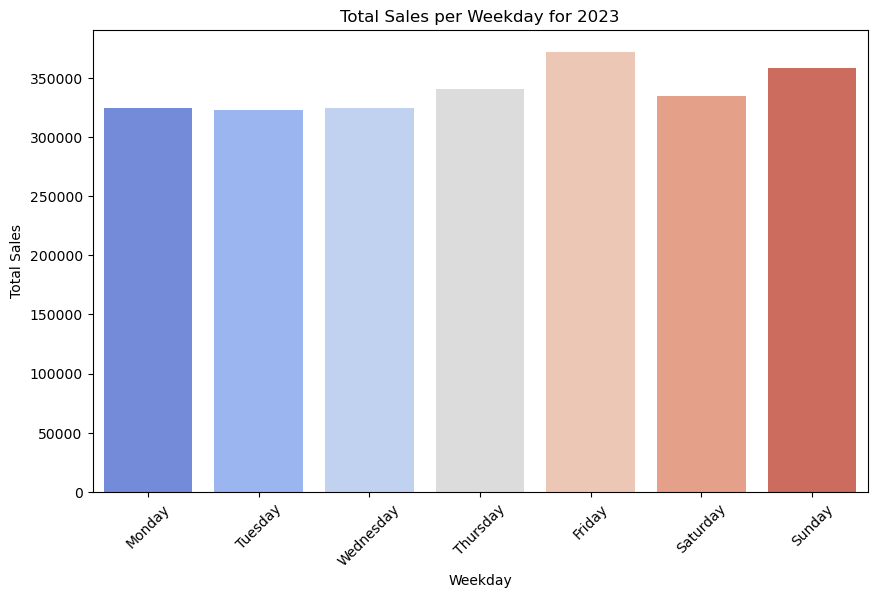

In [390]:
## Visualization Sales by day of the week for 2023

plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday', y='Total Sales', data=daily_sales, palette='coolwarm')
plt.title('Total Sales per Weekday for 2023')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [388]:
## Conclusion
# Smartphones had both the highest quantity ordered and total sales volume, followed by Tablets. 
# Weekends seems to have had the highest customer activity, notably Friday and Sunday. 
# Between March and October of 2023, sales have had sharp decrease. The business has to improve it's customer outreach or marketing strategy for sustained sales. 
# Pick up in total sales for Q4 of 2023 was likely due to holiday seasons. 
# No clear trend on overall monthly sales. 